### import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### read data

In [3]:
train=pd.read_csv("/resources/data/train_file.csv")

In [4]:
test=pd.read_csv("/resources/data/test_file.csv")

### making copy of data

In [5]:
train_original=train.copy()

In [6]:
test_original=test.copy()

### understanding data

### first 5 rows for data

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### checking data total columns

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### checking data column types

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### First we will do univariate analysis in which we will analyse each variable individually.
### For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. 
### For numerical features, probability density plots can be used to look at the distribution of the variable.

### We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

## Frequency table for loan status

In [13]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Frequency table has given us count of each category in column of loan status

### if we want this in form of proportions then we can set normalize=true

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### bar plot for loan status

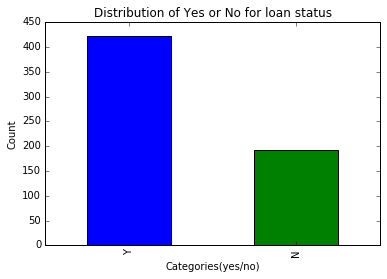

In [15]:
loan_status_plot=train['Loan_Status'].value_counts().plot.bar()
plt.title("Distribution of Yes or No for loan status")
plt.xlabel("Categories(yes/no)")
plt.ylabel("Count")

### This is showing loan of 422 persons(approx. 69%) has been approved out of total 614 persons

### Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

### 1. Salary: Applicants with high income should have more chances of loan approval.
### 2. Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
### 3. Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
### 4. Loan term: Loan for less time period and less amount should have higher chances of approval.
### 5. EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

### Lets try to test the above mentioned hypotheses using bivariate analysis

### After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### First we will see relation of categorical variables vs. target variable

In [16]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


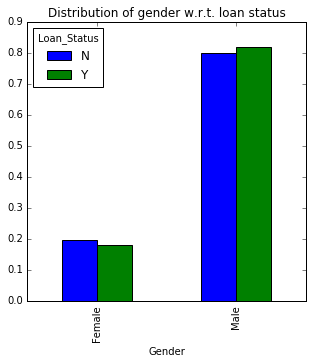

In [17]:
Gender.div(Gender.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of gender w.r.t. loan status")
plt.xlabel("Gender")
plt.show()

### It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

In [18]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


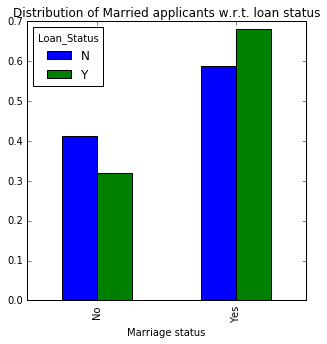

In [19]:
Married.div(Married.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of Married applicants w.r.t. loan status")
plt.xlabel("Marriage status")
plt.show()

### It can be inferred that the proportion of married applicants is more approved loans.

In [20]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


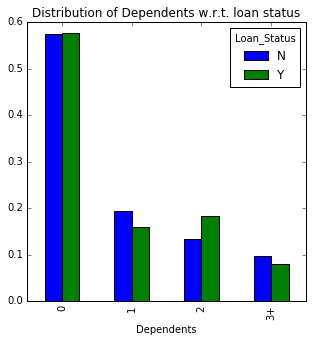

In [21]:
Dependents.div(Dependents.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of Dependents w.r.t. loan status")
plt.xlabel("Dependents")
plt.show()

### Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

In [22]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


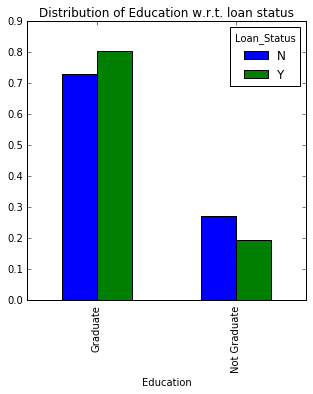

In [23]:
Education.div(Education.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of Education w.r.t. loan status")
plt.xlabel("Education")
plt.show()

### Proportion graduate applicants is higher for the approved loans

In [24]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


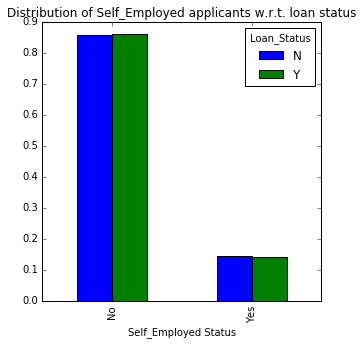

In [25]:
Self_Employed.div(Self_Employed.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of Self_Employed applicants w.r.t. loan status")
plt.xlabel("Self_Employed Status")
plt.show()

### There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

In [26]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


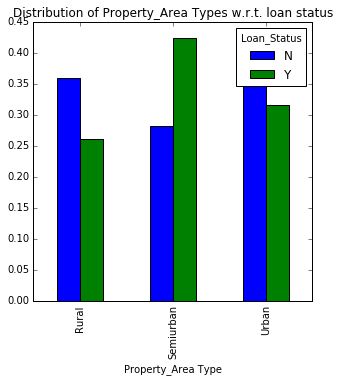

In [27]:
Property_Area.div(Property_Area.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of Property_Area Types w.r.t. loan status")
plt.xlabel("Property_Area Type")
plt.show()

### It can be inferred that the proportion of semiurabn applicants is high as comapred to both rural and urban applicants for approved loans.
### It can not be inferred from rural and urban applicants, they both are more or less at same level in geeting loan approved. 
### But even after comparing we can infer that urban applicants are getting more loan approvals as compared to rural applicants.

In [28]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


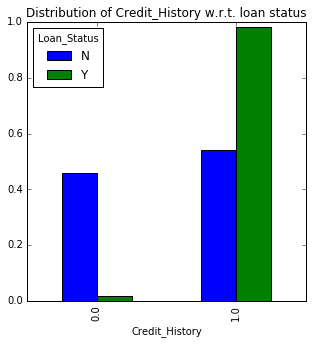

In [29]:
Credit_History.div(Credit_History.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of Credit_History w.r.t. loan status")
plt.xlabel("Credit_History")
plt.show()

### It can be inferred that the proportion of applicants with credit history 1 is very high for approved loans.

### Now let’s visualize numerical independent variables with respect to target variable.
### 1. Applicant Income 
### 2. Coapplicant Income      
### 3. Loan Amount           
### 4. Loan_Amount_Term     

### For Applicant income, we have to calculate the mean of income and then making plot of income w.r.t. loan status

In [30]:
income=train.groupby("Loan_Status")['ApplicantIncome'].mean()
income

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

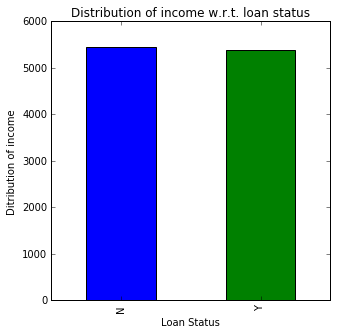

In [31]:
income.plot(kind="bar", figsize=(5,5))
plt.title("Distribution of income w.r.t. loan status")
plt.xlabel("Loan Status")
plt.ylabel("Ditribution of income")
plt.show()

### This seems incomplete as there is no separation of income distribution for both status of loan
### we have to make bins to distinguish them.

In [32]:
bins=[0,2500,5000,10000,90000]
groups=['Low','Medium', 'High', 'Very High']

In [33]:
train['Income_Bin']=pd.cut(train['ApplicantIncome'],bins,labels=groups)
Income_Bin=pd.crosstab(train['Income_Bin'], train['Loan_Status'])
Income_Bin

Loan_Status,N,Y
Income_Bin,,
Low,34,74
Medium,99,216
High,42,97
Very High,17,35


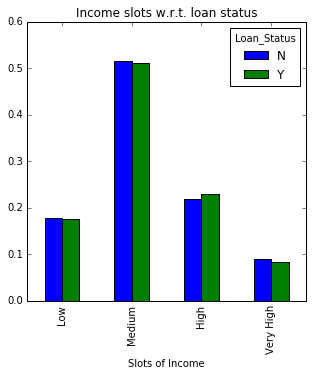

In [34]:
Income_Bin.div(Income_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("Income slots w.r.t. loan status")
plt.xlabel("Slots of Income")
plt.show()

### It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

### Now we will analyse other (three left) numerical variables in similar way.

In [35]:
bins=[0,2500,5000,50000]
groups=['Low','Medium', 'High']

In [36]:
train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'],bins,labels=groups)
Coapplicant_Income_Bin=pd.crosstab(train['Coapplicant_Income_Bin'], train['Loan_Status'])
Coapplicant_Income_Bin

Loan_Status,N,Y
Coapplicant_Income_Bin,,
Low,53,161
Medium,32,65
High,11,19


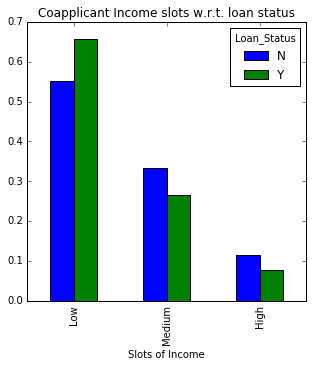

In [37]:
Coapplicant_Income_Bin.div(Coapplicant_Income_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("Coapplicant Income slots w.r.t. loan status")
plt.xlabel("Slots of Income")
plt.show()

### It shows that if coapplicant’s income is less the chances of loan approval are high.

### But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [38]:
bins=[0,2500,5000,10000,90000]
groups=['Low','Medium', 'High', 'Very High']

In [39]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_Income_Bin']=pd.cut(train['Total_Income'],bins,labels=groups)
Total_Income_Bin=pd.crosstab(train['Total_Income_Bin'], train['Loan_Status'])

Total_Income_Bin

Loan_Status,N,Y
Total_Income_Bin,,
Low,14,10
Medium,75,171
High,74,183
Very High,29,58


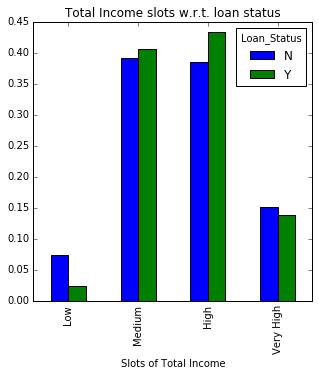

In [40]:
Total_Income_Bin.div(Total_Income_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("Total Income slots w.r.t. loan status")
plt.xlabel("Slots of Total Income")
plt.show()

### We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Medium and High Income as Very high income applicants also have not much probability of getting their loans approved.
### We can inferred that applicants with medium and high total income have high chances of getting loans approved.

In [41]:
bins=[0,200,400,1000]
groups=['Low','Medium', 'High']

In [42]:
train['Loan_Amount_Bin']=pd.cut(train['LoanAmount'],bins,labels=groups)
Loan_Amount_Bin=pd.crosstab(train['Loan_Amount_Bin'], train['Loan_Status'])
Loan_Amount_Bin

Loan_Status,N,Y
Loan_Amount_Bin,,
Low,150,362
Medium,27,39
High,4,10


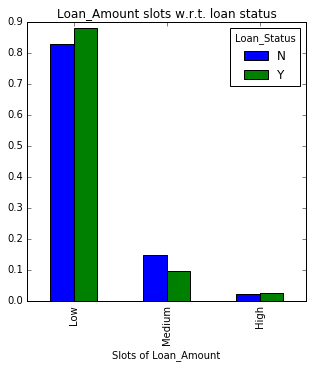

In [43]:
Loan_Amount_Bin.div(Loan_Amount_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("Loan_Amount slots w.r.t. loan status")
plt.xlabel("Slots of Loan_Amount")
plt.show()

### We can inferred from above that chances of getting loan approved has been increased in case of less loan amount.
### As loan amount increases, chances of getting loans approved  decreases.
### This result supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [44]:
bins=[0,20,50,100]
groups=['Low','Medium', 'High']

In [45]:
train['Loan_Amount_Term_Bin']=pd.cut(train['Loan_Amount_Term'],bins,labels=groups)
Loan_Amount_Term_Bin=pd.crosstab(train['Loan_Amount_Term_Bin'], train['Loan_Status'])
Loan_Amount_Term_Bin

Loan_Status,N,Y
Loan_Amount_Term_Bin,,
Low,0,1
Medium,2,0
High,1,5


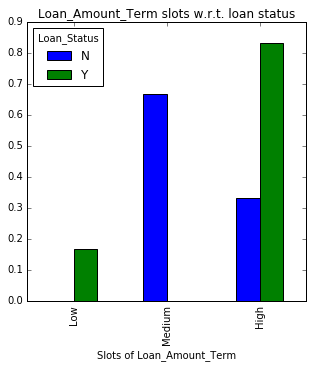

In [46]:
Loan_Amount_Term_Bin.div(Loan_Amount_Term_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("Loan_Amount_Term slots w.r.t. loan status")
plt.xlabel("Slots of Loan_Amount_Term")
plt.show()

### It can be inferred from above that Long term loans to be repaid have high chances of getting loans aproved.

### Let’s drop the bins which we created for the exploration part.
### We will change the 3+ in dependents variable to 3 to make it a numerical variable.
### We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. 
### One more reason to do so is few models like logistic regression takes only numeric values as input.
### We will replace N with 0 and Y with 1 in loan status.

In [47]:
train=train.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'Loan_Amount_Bin','Loan_Amount_Term_Bin', 'Total_Income_Bin', 'Total_Income'], axis=1)

In [48]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Now lets look at the correlation between all the numerical variables.
### We will use the heat map to visualize the correlation. 
### Heatmaps visualize data through variations in coloring.
### The variables with darker color means their correlation is more.

In [49]:
matrix=train.corr()

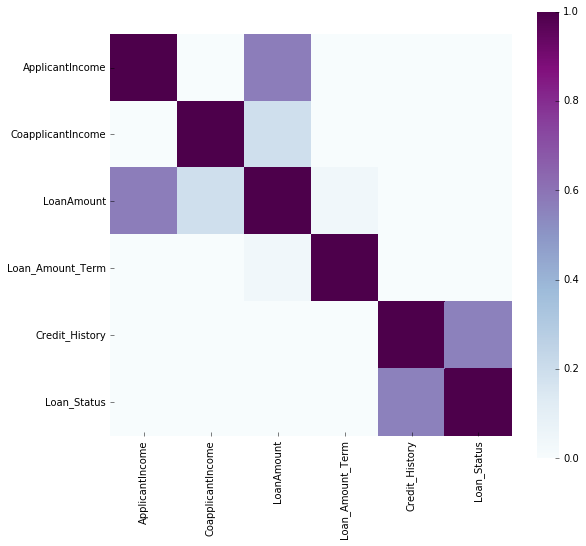

In [50]:
relation=plt.subplots(figsize=(9,8))
sns.heatmap(matrix, square=True, cmap="BuPu", vmin=0.0, vmax= 1.0)

### We can observe from this coloured heatmap that, the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). 
### LoanAmount is also correlated with CoapplicantIncome but in lighter way.

### After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [51]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### These all are missing values from following coloumns of dataframe which we have to treat.
### 1. Gender
### 2. Married               
### 3. Dependents           
### 4. Self_Employed        
### 5. LoanAmount           
### 6. Loan_Amount_Term     
### 7. Credit_History 

### So we will treat them by filling null values with mean of the dataset columns

In [52]:
train.fillna(train.mean(), inplace=True)


In [53]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Evaluation Metrics for Classification Problems

### The process of model building is not complete without evaluation of model’s performance. 
### Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:
### 1. Accuracy(using confusion matrix, Actual vs Predicted values.)
### 2. Precision(measure of correctness achieved in true prediction)
### 3. Recall(Sensitivity) ( measure of actual observations which are predicted correctly)
### 4. Specificity(measure of false class observations which are predicted correctly)
### 5. ROC curve(receiver operating charateristics)


### Model Development

### Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.


In [114]:
a=test.drop("Loan_ID", axis=1)

In [115]:

train1=pd.get_dummies(train) 
test1=pd.get_dummies(a)

In [116]:
train1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Loan_ID_LP001002',
       'Loan_ID_LP001003', 'Loan_ID_LP001005', 'Loan_ID_LP001006',
       ...
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object', length=635)

In [117]:
train1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1


In [118]:
features=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Credit_History', 'Dependents_0', 'Dependents_1', 
          'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban']

In [119]:
x = train1[features] # Features
y = train1.Loan_Status # Target variable

In [120]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
x_train1,x_cv,y_train1,y_cv=train_test_split(x,y,test_size=0.25,random_state=0)

In [121]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()



In [122]:
# fit the model with data
model.fit(x_train1,y_train1)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
pred_cv = model.predict(x_cv)
pred_cv

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [124]:
pred_cv.size

154

In [125]:
q=test1.isnull().sum()

In [126]:
test1.fillna(test1.mean(), inplace=True)


In [127]:
r=test1.isnull().sum()

In [128]:
test1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [129]:
test1.shape

(367, 20)

In [131]:
u=test1.drop('Gender_Female', axis=1)

In [137]:
v=u.drop('Gender_Male', axis=1)

In [138]:
w=v.drop('Married_No', axis=1)

In [139]:
x=w.drop('Married_Yes', axis=1)

In [140]:
s=x.drop('Dependents_3', axis=1)

In [141]:
pred_s = model.predict(s)

### Model Evaluation using Confusion Matrix
### A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [142]:
from sklearn import metrics

In [143]:
cnf_matrix=metrics.confusion_matrix(y_cv, pred_cv)
cnf_matrix

array([[ 20,  23],
       [  2, 109]])

### Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.
### So here 20, 109 are correct predictions for binary outcome(0,1) and 2,23 are incorrect predictions which is good and prooves model to be efficient enough for predictions. 

### Visualizing Confusion Matrix using Heatmap

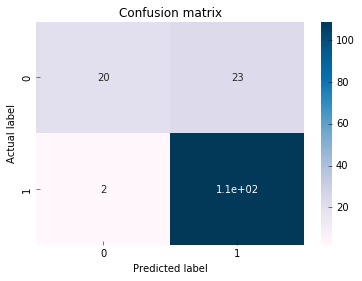

In [144]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

### create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='PuBu')
ax.xaxis.set_label_position("bottom")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [145]:
print("Accuracy:",metrics.accuracy_score(y_cv, pred_cv))
print("Precision:",metrics.precision_score(y_cv, pred_cv))
print("Recall:",metrics.recall_score(y_cv, pred_cv))

Accuracy: 0.8376623376623377
Precision: 0.8257575757575758
Recall: 0.9819819819819819


### classification rate of 83%, considered as good accuracy.
### 83% of precision is showing that our madel can measure correctness of loan approved in 83% cass.
### Recall percentage of 98% inferred the measure of actual abservations of loans approved which are predicted correctly.

### ROC Curve
### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

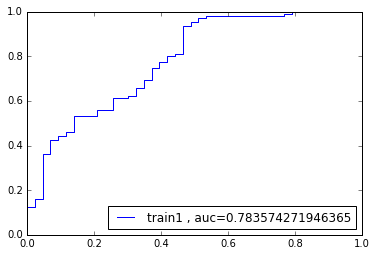

In [147]:
pred_cv_proba = model.predict_proba(x_cv)[::,1]
fpr, tpr, _  = metrics.roc_curve(y_cv,  pred_cv_proba)
auc = metrics.roc_auc_score(y_cv, pred_cv_proba)
plt.plot(fpr, tpr, label="train1 , auc="+str(auc))
plt.legend(loc=4)
plt.show()

### AUC score for the case is 0.78 whicvh is good enough for good classifier. 
### AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

### let us make predictions for test dataset

In [148]:
submission=pd.read_csv("/resources/data/sample_submission_S7jWYrJ.csv")

In [149]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0


In [150]:
submission['Loan_ID']=test_original['Loan_ID']

In [151]:
test_original['Loan_ID'].size

367

In [152]:
submission['Loan_Status']=pred_s

### Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [153]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)


### Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [154]:
from IPython.display import FileLink, FileLinks

In [155]:
z=pd.DataFrame(submission, columns=['Loan_ID','Loan_Status'])

In [156]:
z.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [157]:
import base64

In [158]:
from IPython.display import HTML

def create_download_link( submission, title = "Download CSV file", filename = "logistic.csv"):  
    csv = submission.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)

### Feature Engineering

### Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

### 1. Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
### 2. EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
### 3. Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [159]:
train1['Total_Income']=train1['ApplicantIncome']+train1['CoapplicantIncome']
test1['Total_Income']=test1['ApplicantIncome']+test1['CoapplicantIncome']

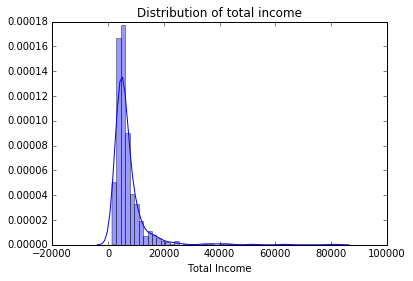

In [160]:
sns.distplot(train1['Total_Income'])
plt.title("Distribution of total income")
plt.xlabel("Total Income")
plt.show()

### We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

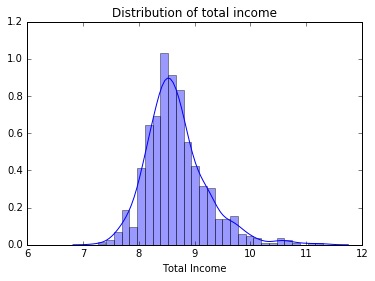

In [161]:
train1['Total_Income_log'] = np.log(train1['Total_Income'])
sns.distplot(train1['Total_Income_log'])
plt.title("Distribution of total income")
plt.xlabel("Total Income")
plt.show()



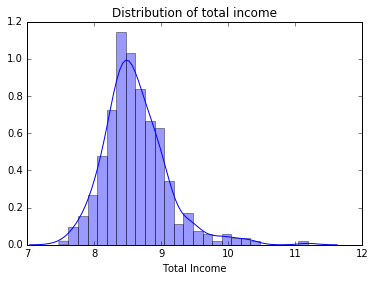

In [162]:
test1['Total_Income_log'] = np.log(test1['Total_Income'])
sns.distplot(test1['Total_Income_log'])
plt.title("Distribution of total income")
plt.xlabel("Total Income")
plt.show()

### let's make same for EMI feature now

In [163]:
train1['EMI']=train1['LoanAmount']/train1['Loan_Amount_Term'] 
test1['EMI']=test1['LoanAmount']/test1['Loan_Amount_Term']

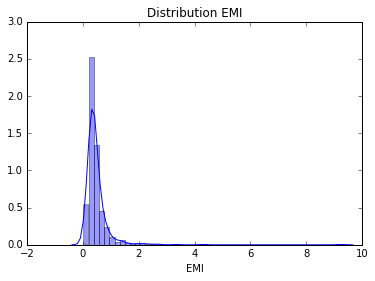

In [164]:
sns.distplot(train1['EMI'])
plt.title("Distribution EMI")
plt.xlabel("EMI")
plt.show()

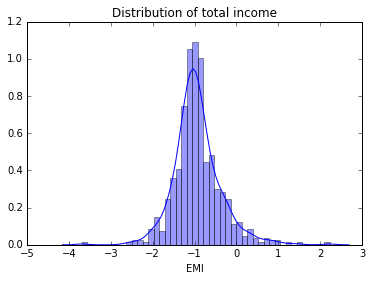

In [165]:
train1['EMI.log'] = np.log(train1['EMI'])
sns.distplot(train1['EMI.log'])
plt.title("Distribution of total income")
plt.xlabel("EMI")
plt.show()

### Same plot for balance income now.

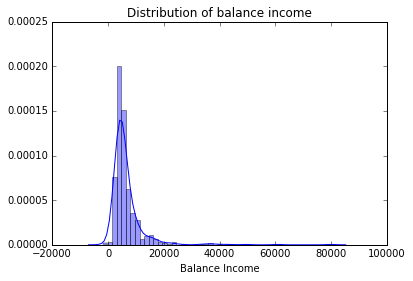

In [166]:
train1['Balance Income']=train1['Total_Income']-(train1['EMI']*1000) # Multiply with 1000 to make the units equal 
test1['Balance Income']=test1['Total_Income']-(test1['EMI']*1000)
sns.distplot(train1['Balance Income'])
plt.title("Distribution of balance income")
plt.xlabel("Balance Income")
plt.show()

### Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [167]:
train1=train1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test1=test1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

### To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. 

### Let’s import StratifiedKFold from sklearn and fit the model.

In [168]:
from sklearn.model_selection import StratifiedKFold

### Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset.

In [172]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train1_index,s_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train1_index],x.loc[s_index]
    ytr,yvl = y[train1_index],y[s_index]
    
    model = LogisticRegression(random_state=1)
    
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl) 

ValueError: Found input variables with inconsistent numbers of samples: [367, 614]